# Hand Pose Recognition for Music Control

In [3]:
import utils as u 

In [4]:
file_paths = ["../Data/data1.json", 
              "../Data/data2.json", 
              "../Data/data3.json", 
              "../Data/data4.json", 
              "../Data/data5.json", 
              "../Data/data6.json", 
              "../Data/data7.json",
              "../Data/data8.json",
              ]


x_data, y_data = u.load_data(file_paths) 
print(y_data) 

[1 1 1 ... 0 0 0]


In [5]:
x_data, y_data = u.shuffle_data(x_data, y_data, random_seed=20) 
print(y_data)

[0 1 1 ... 0 1 0]


In [6]:
split_idx = int(len(x_data) * 0.8)
x_train, y_train, x_test, y_test = u.split_data(x_data, y_data, split_idx)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(564982, 63) (564982,) (141246, 63) (141246,)


In [8]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(508484, 63) (508484,) (141246, 63) (141246,)


In [10]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
1.3344004154205322
-0.48810917139053345
2
1.3344004154205322
-0.48810917139053345


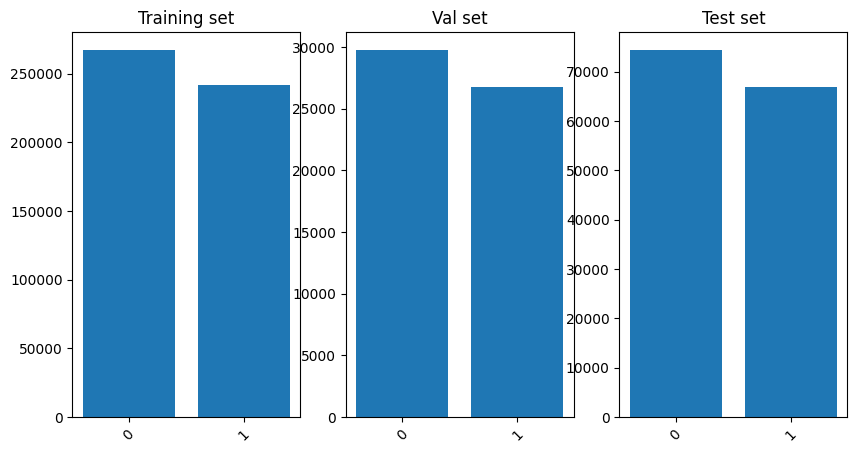

In [11]:
u.explore_data(x_train, y_train, y_test, y_val)

# Build Model I

In [12]:
baseline = u.build_baseline()


In [13]:
class_weights = {0: 0.9, 
                 1: 1} 

In [14]:
history, baseline = u.train_model(baseline, x_train, y_train, x_val, y_val, 
                      epochs=10, batch_size=32, class_weights=class_weights) 

Epoch 1/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.2558 - accuracy: 0.8673 - val_loss: 0.2243 - val_accuracy: 0.8628
Epoch 2/10
15891/15891 [==============================] - 17s 1ms/step - loss: 0.1989 - accuracy: 0.8777 - val_loss: 0.2301 - val_accuracy: 0.8571
Epoch 3/10
15891/15891 [==============================] - 17s 1ms/step - loss: 0.1922 - accuracy: 0.8792 - val_loss: 0.1969 - val_accuracy: 0.8787
Epoch 4/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.1897 - accuracy: 0.8797 - val_loss: 0.1963 - val_accuracy: 0.8810
Epoch 5/10
15891/15891 [==============================] - 17s 1ms/step - loss: 0.1882 - accuracy: 0.8800 - val_loss: 0.1940 - val_accuracy: 0.8814
Epoch 6/10
15891/15891 [==============================] - 17s 1ms/step - loss: 0.1871 - accuracy: 0.8812 - val_loss: 0.1966 - val_accuracy: 0.8840
Epoch 7/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.1863 - accuracy: 0.8814 - val_loss: 0

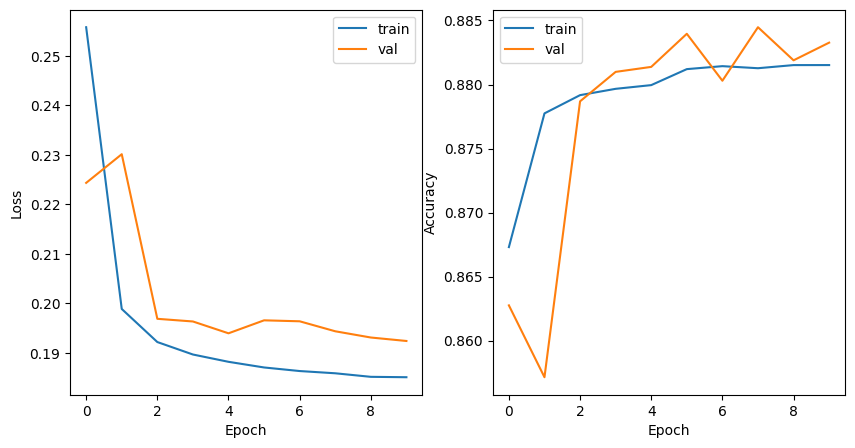

In [15]:
u.plot_loss(history)

# Model I Evaluation

In [16]:
test_acc, y_pred = u.test_model(baseline, x_test, y_test)
print(y_pred)

4414/4414 [==============================] - 3s 574us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [17]:
# Model report sourced and adjusted from DL4M Homework 1: 
# https://github.com/dl4m/homework-1-RubyQianru

from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = u.classify_handpose(baseline, x_test)

# Compute classification report
target_names = ["Target Handpose", "Not Target Handpose"]
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)


4414/4414 [==============================] - 3s 583us/step
                     precision    recall  f1-score   support

    Target Handpose       0.83      0.97      0.90     74302
Not Target Handpose       0.96      0.79      0.86     66944

           accuracy                           0.88    141246
          macro avg       0.90      0.88      0.88    141246
       weighted avg       0.89      0.88      0.88    141246



In [18]:
# Classify handpose sourced and adjusted from DL4M Homework 1: 
# https://github.com/dl4m/homework-1-RubyQianru

# sample random handpose
idx = np.random.randint(0, len(y_test), size=1)[0] 
handpose_features = x_test[idx][np.newaxis, :] 
print('This handpose is not the target handpose.' if y_test[idx]==0 else 
      'This handpose is the target handpose.')

# Use your model to make predictions
y_pred = u.classify_handpose(baseline, handpose_features)

if y_pred[0] == 1:
    print('The model says this handpose is the target handpose.')
else:
    print('The model says this handpose is not the target handpose.')

This handpose is not the target handpose.
1/1 [==============================] - 0s 17ms/step
The model says this handpose is not the target handpose.


In [19]:
print(test_acc)

0.883486966002577


In [20]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4096      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6245 (24.39 KB)
Trainable params: 6245 (24.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Build Model II

In [21]:
model = u.build_model()

In [22]:
class_weights = {0: 1, # o
                 1: 1} # n

In [23]:
history, model = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64, class_weights=class_weights)

Epoch 1/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.2961 - accuracy: 0.8518 - val_loss: 0.2460 - val_accuracy: 0.8724
Epoch 2/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.2351 - accuracy: 0.8688 - val_loss: 0.2299 - val_accuracy: 0.8782
Epoch 3/30
7946/7946 [==============================] - 8s 1ms/step - loss: 0.2241 - accuracy: 0.8724 - val_loss: 0.2241 - val_accuracy: 0.8719
Epoch 4/30
7946/7946 [==============================] - 8s 1ms/step - loss: 0.2192 - accuracy: 0.8740 - val_loss: 0.2163 - val_accuracy: 0.8724
Epoch 5/30
7946/7946 [==============================] - 8s 1ms/step - loss: 0.2165 - accuracy: 0.8738 - val_loss: 0.2159 - val_accuracy: 0.8730
Epoch 6/30
7946/7946 [==============================] - 8s 1ms/step - loss: 0.2142 - accuracy: 0.8752 - val_loss: 0.2474 - val_accuracy: 0.8841
Epoch 7/30
7946/7946 [==============================] - 8s 1ms/step - loss: 0.2116 - accuracy: 0.8761 - val_loss: 0.2071 - val_accuracy:

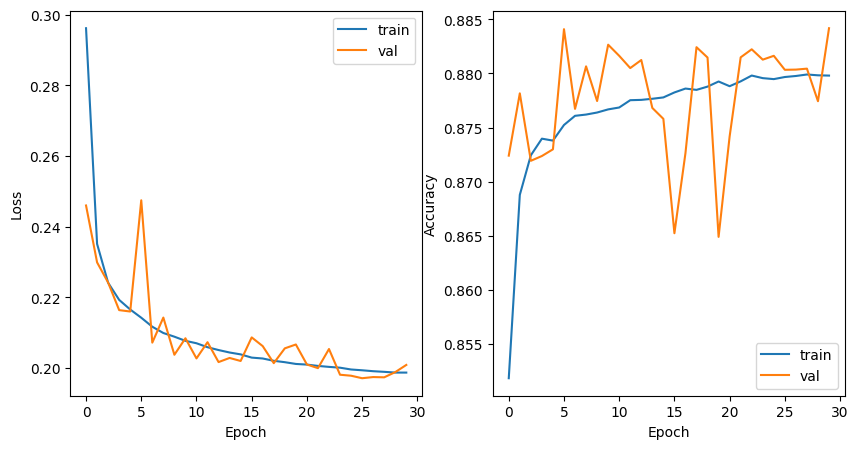

In [24]:
u.plot_loss(history)

# Model Evaluation

In [25]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

4414/4414 [==============================] - 3s 583us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [26]:
# Model report sourced and adjusted from DL4M Homework 1: 
# https://github.com/dl4m/homework-1-RubyQianru

from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = u.classify_handpose(model, x_test)

# Compute classification report
target_names = ["Target Handpose", "Not Target Handpose"]
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)

4414/4414 [==============================] - 3s 588us/step
                     precision    recall  f1-score   support

    Target Handpose       0.83      0.99      0.90     74302
Not Target Handpose       0.99      0.77      0.86     66944

           accuracy                           0.88    141246
          macro avg       0.91      0.88      0.88    141246
       weighted avg       0.90      0.88      0.88    141246



In [27]:
# Classify handpose sourced and adjusted from DL4M Homework 1: 
# https://github.com/dl4m/homework-1-RubyQianru

# sample random handpose
idx = np.random.randint(0, len(y_test), size=1)[0] 
handpose_features = x_test[idx][np.newaxis, :] 
print('This handpose is not the target handpose.' if y_test[idx]==0 else 
      'This handpose is the target handpose.')

# Use your model to make predictions
y_pred = u.classify_handpose(baseline, handpose_features)

if y_pred[0] == 1:
    print('The model says this handpose is the target handpose.')
else:
    print('The model says this handpose is not the target handpose.')

This handpose is not the target handpose.
1/1 [==============================] - 0s 16ms/step
The model says this handpose is not the target handpose.


In [28]:
print(test_acc)

0.8846197414440055


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                4096      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4757 (18.58 KB)
Trainable params: 4757 (18.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.save('./Handpose-Recognition.h5')

/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Posture-Recognition/tfjsmodel


Traceback (most recent call last):
  File "/Users/qianruzhang/anaconda3/envs/dl4m/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 958, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 962, in main
    convert(argv[0].split(' '))
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 948, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 634, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_graph_model_conversion(
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/co